In [57]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.DataSet import DataSet
from tools.ModelTester import ModelTester
from models import Models
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

# Stratisfied split !
# X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(dataset.features, dataset.labels, test_size=0.3, stratify=dataset.labels)
# train_set = DataSet(X_train, y_train)
# test_set = DataSet(X_test, y_test)
dataset.shuffle()
train_set, test_set = dataset.stratified_split([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
...,...
Ulmus_Bergmanniana,10
Quercus_Nigra,10
Salix_Intergra,10
Quercus_Infectoria_sub,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


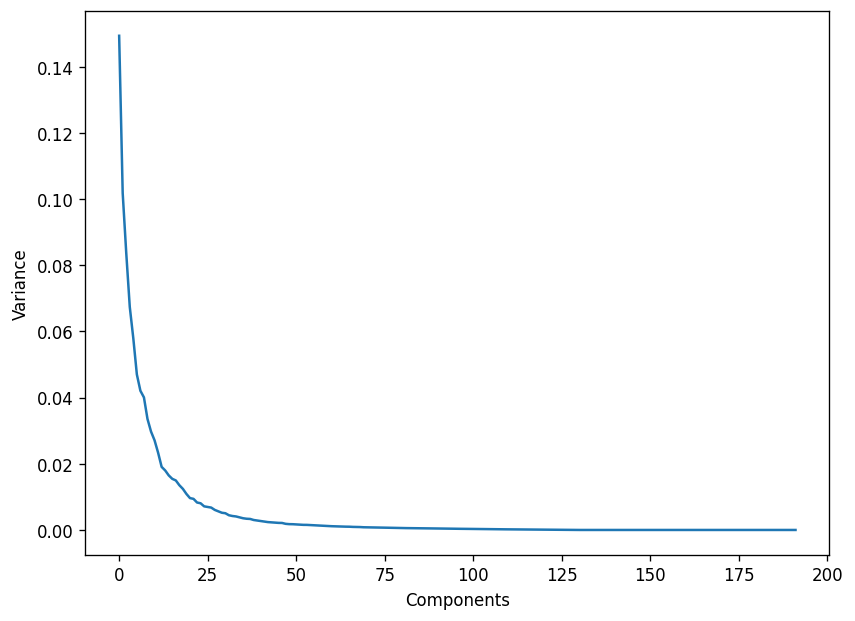

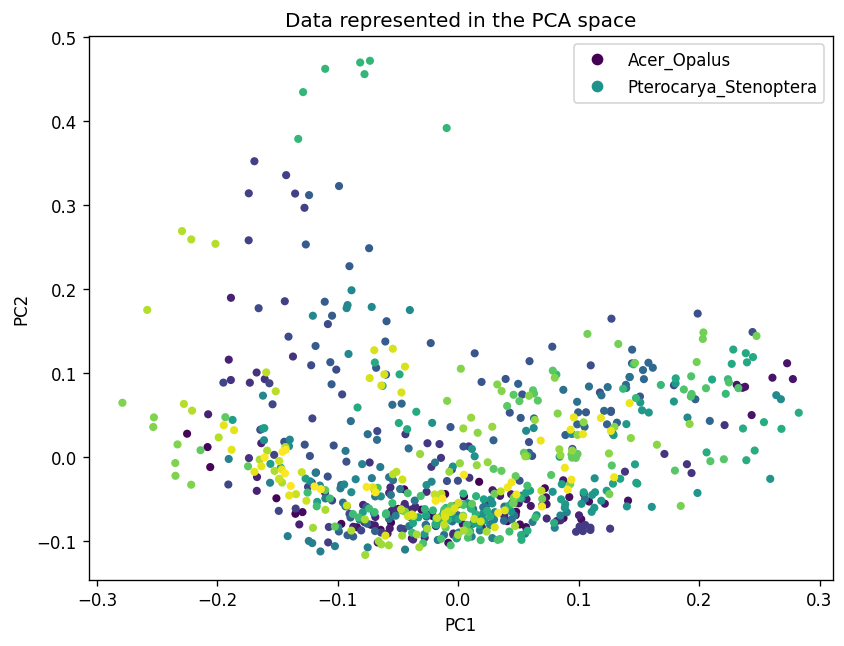

In [59]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


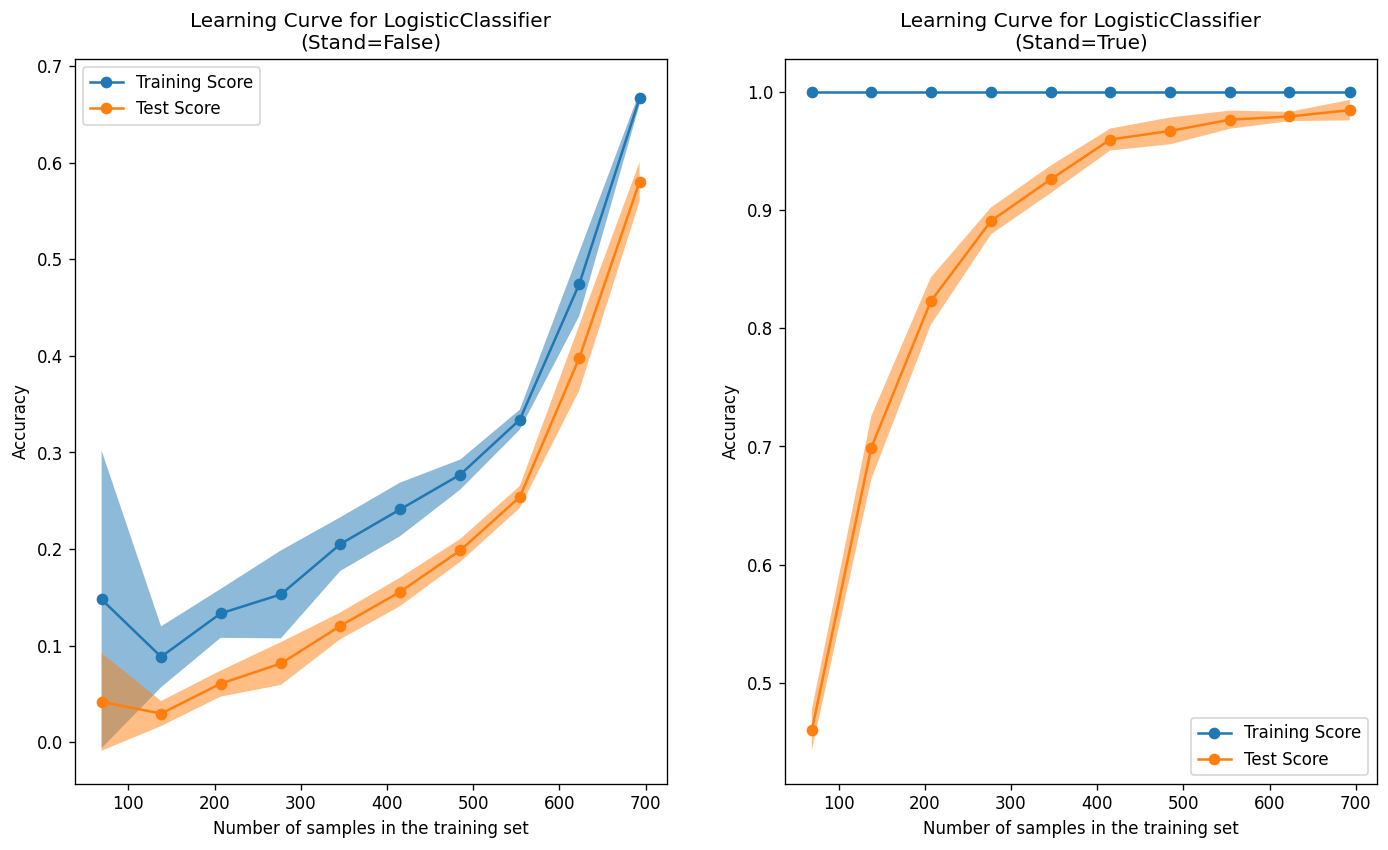

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


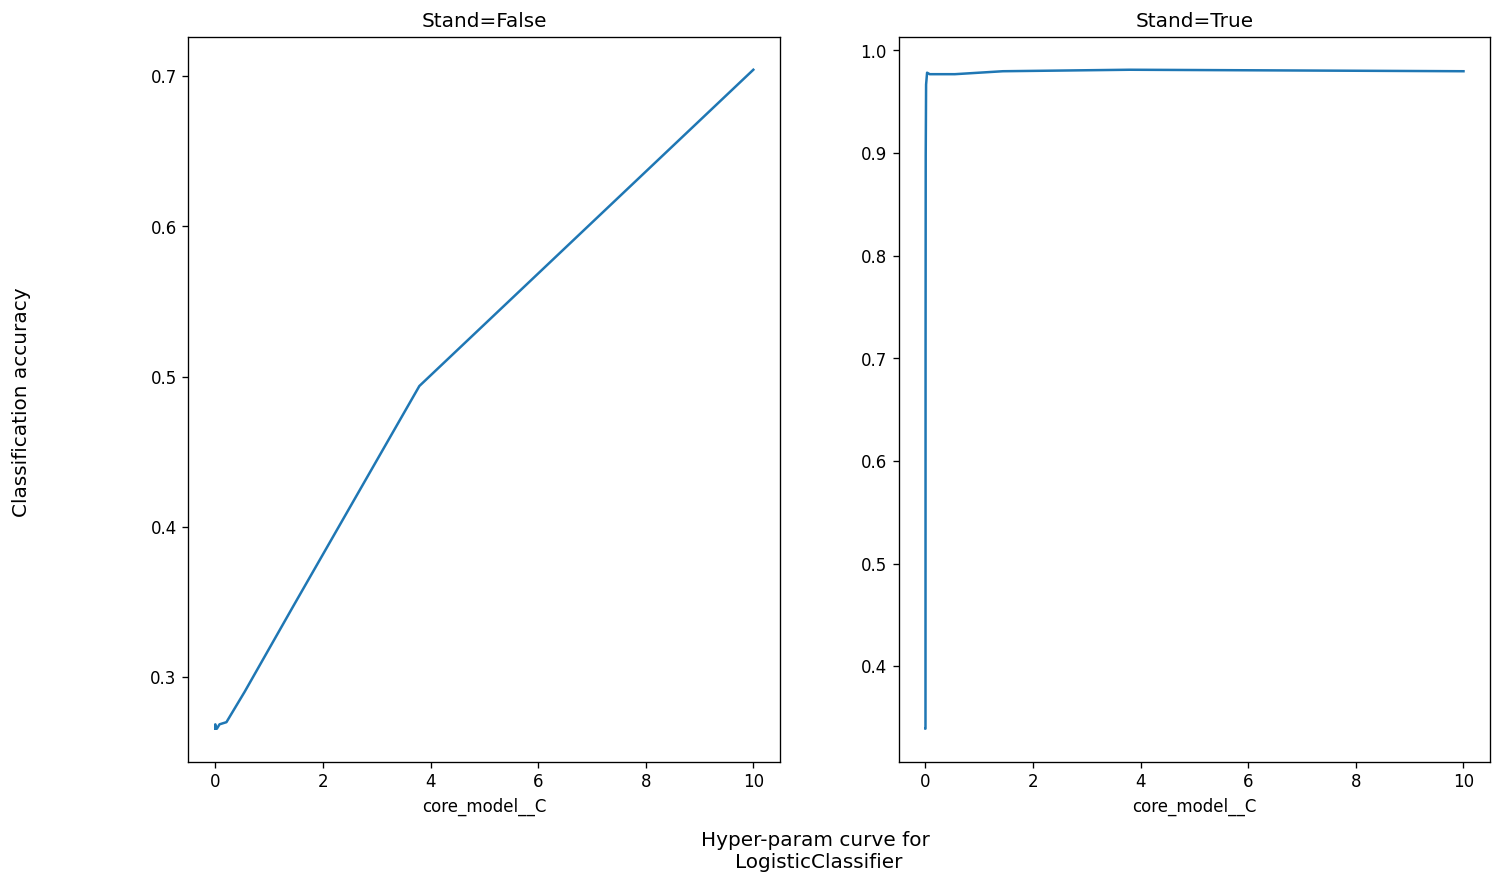

,LogisticClassifier (Stand=False),LogisticClassifier (Stand=True)
Accuracy,0.907648,1.000000
Precision,0.907648,1.000000
Sensitivity,0.907648,1.000000
Specificity,0.999058,1.000000
Fallout,0.000942,0.000000
F1 Score,0.864134,1.000000
ROC AUC,0.997930,1.000000
Log loss,2.375586,0.008818


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,LogisticClassifier (Stand=False),LogisticClassifier (Stand=True)
Accuracy,0.851852,0.979798
Precision,0.851852,0.979798
Sensitivity,0.851852,0.979798
Specificity,0.998488,0.999794
Fallout,0.001512,0.000206
F1 Score,0.784344,0.969901
ROC AUC,0.994961,1.000000
Log loss,2.548910,0.088875


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


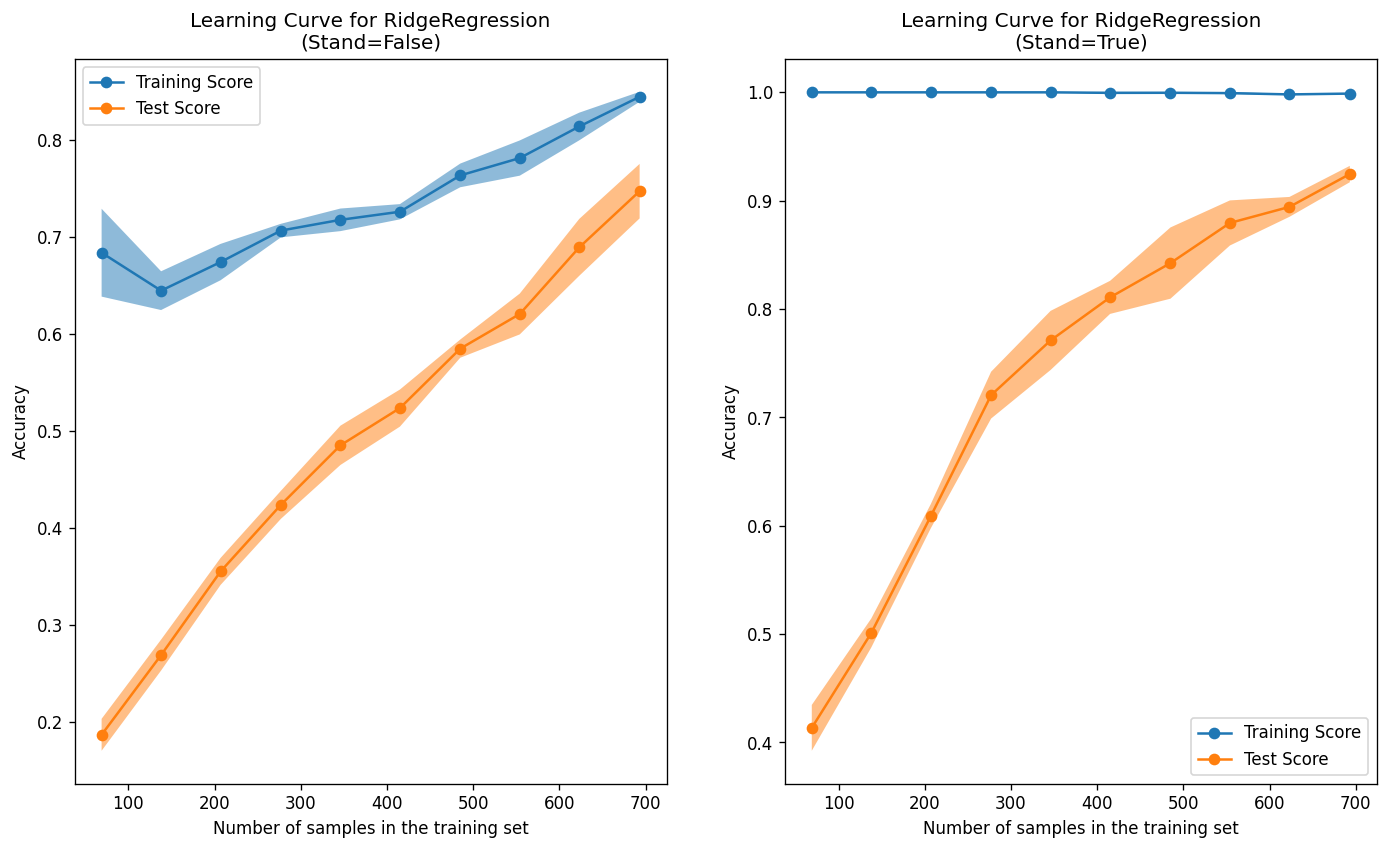

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


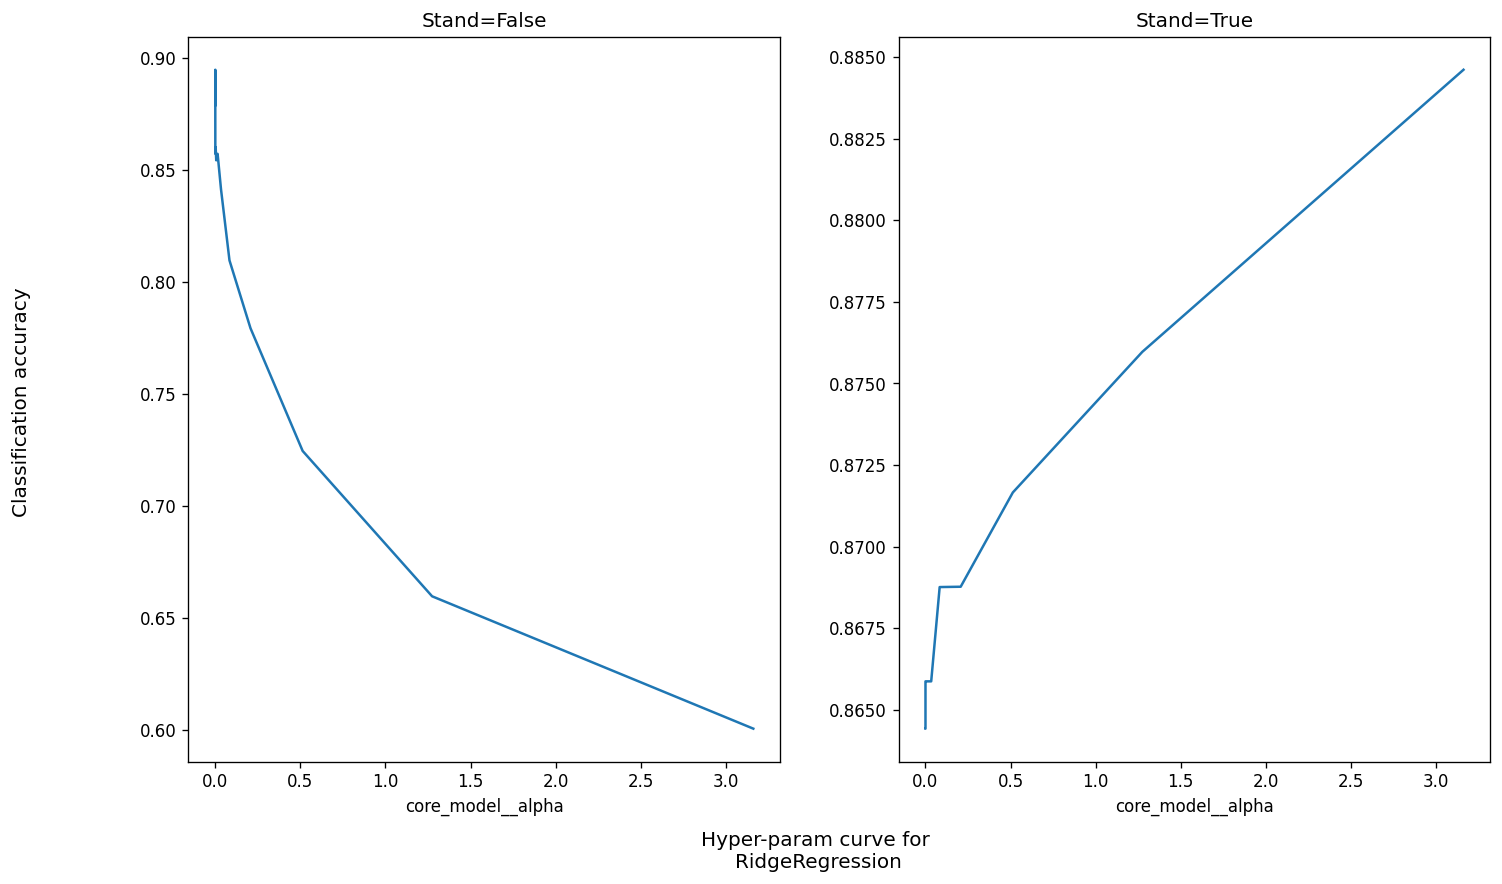

,RidgeRegression (Stand=False),RidgeRegression (Stand=True)
Accuracy,1.0,1.0
Precision,1.0,1.0
Sensitivity,1.0,1.0
Specificity,1.0,1.0
Fallout,0.0,0.0
F1 Score,1.0,1.0
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,RidgeRegression (Stand=False),RidgeRegression (Stand=True)
Accuracy,0.9427609427609428,0.936026936026936
Precision,0.9427609427609428,0.936026936026936
Sensitivity,0.9427609427609428,0.936026936026936
Specificity,0.9994159279873566,0.9993472136329279
Fallout,0.0005840720126434412,0.0006527863670720813
F1 Score,0.9152597876969438,0.9054026324800852
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


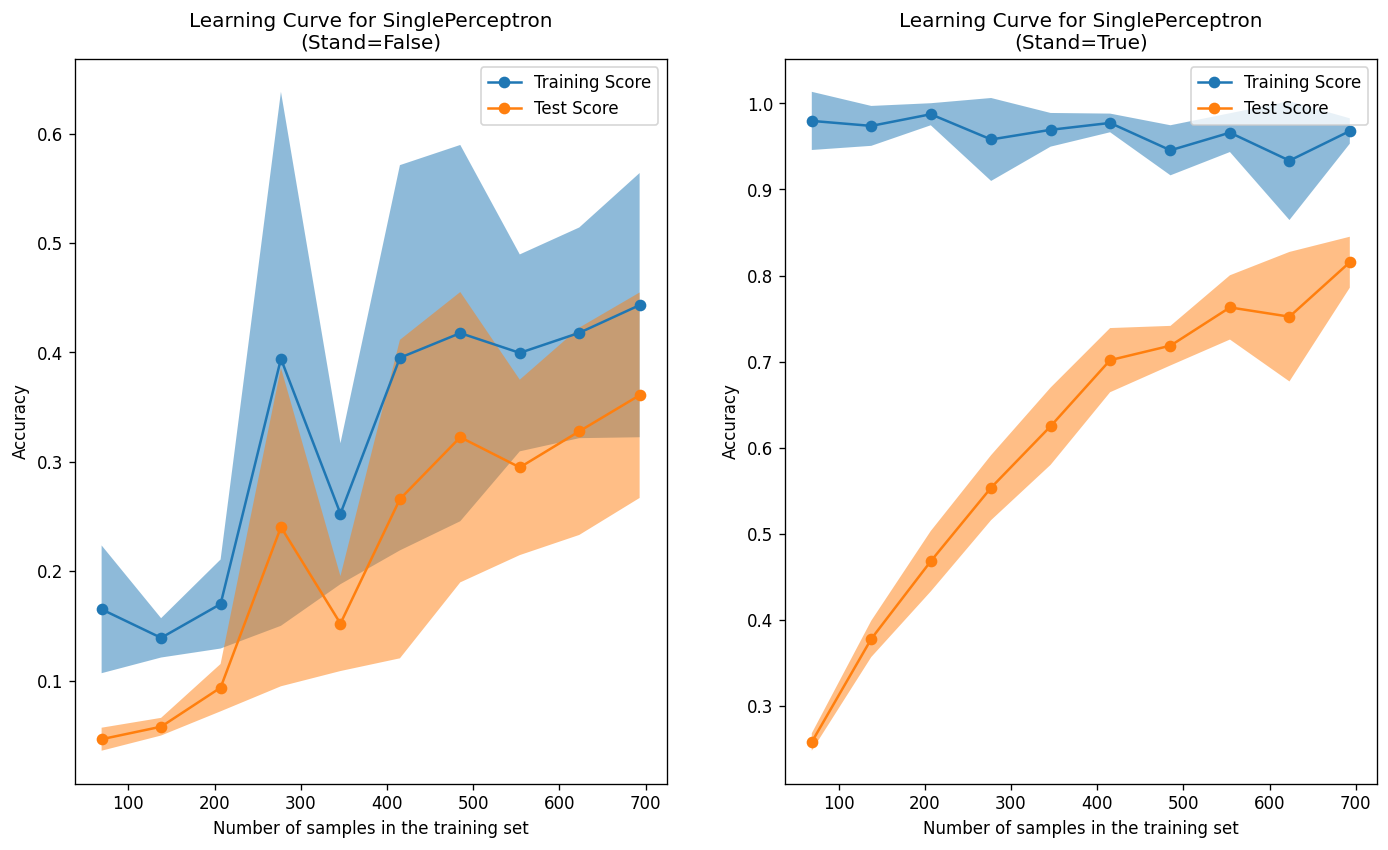

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


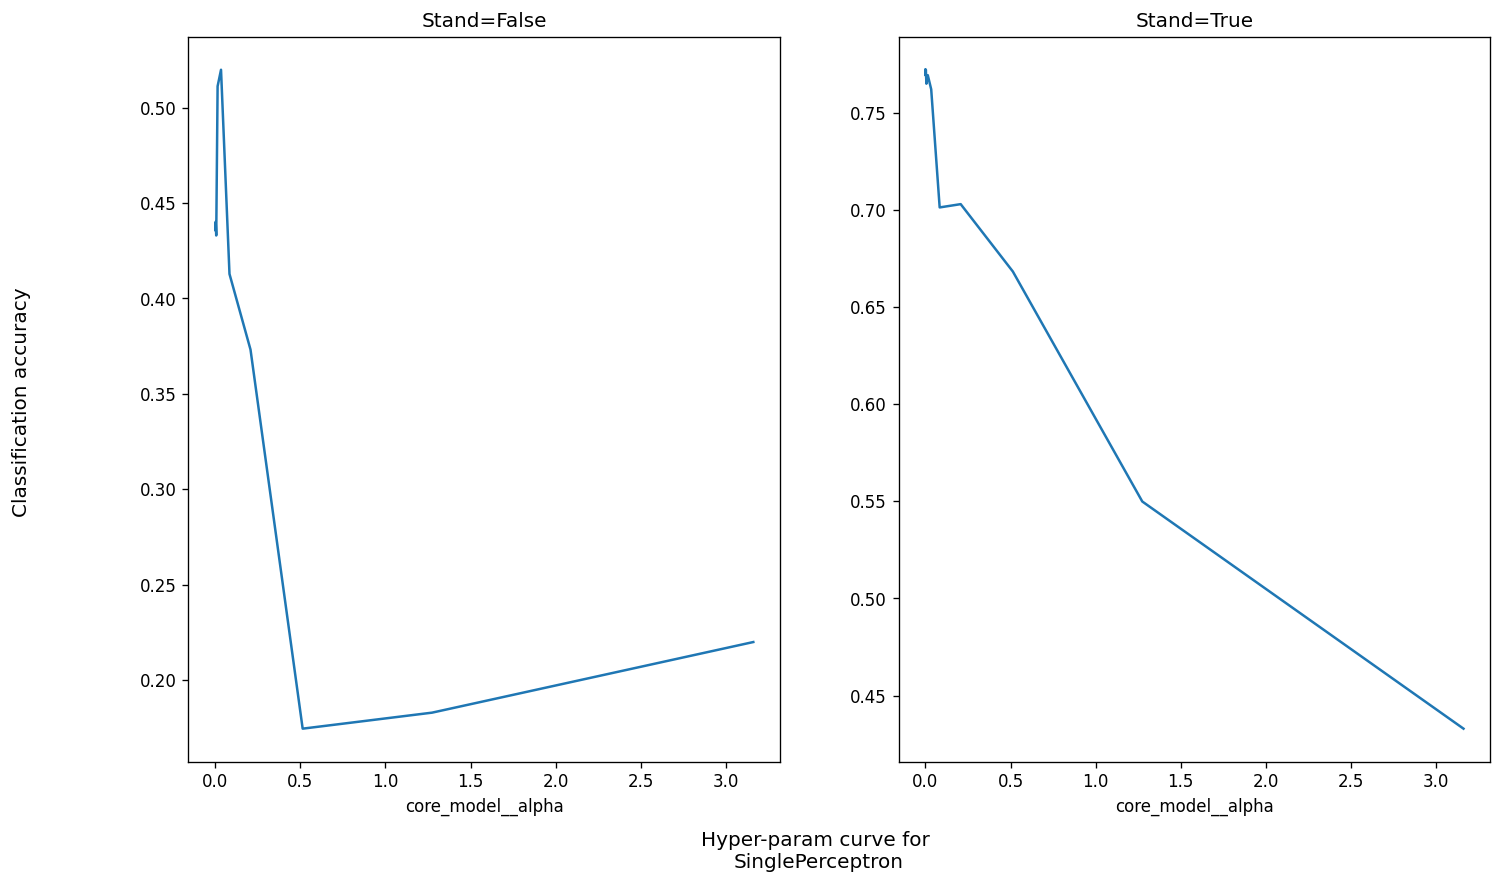

,SinglePerceptron (Stand=False),SinglePerceptron (Stand=True)
Accuracy,0.8080808080808081,0.937950937950938
Precision,0.8080808080808081,0.937950937950938
Sensitivity,0.8080808080808081,0.937950937950938
Specificity,0.9980416408987838,0.9993668463056218
Fallout,0.001958359101216244,0.0006331536943781842
F1 Score,0.7230900571082046,0.9082164724365513
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,SinglePerceptron (Stand=False),SinglePerceptron (Stand=True)
Accuracy,0.7003367003367004,0.7744107744107744
Precision,0.7003367003367004,0.7744107744107744
Sensitivity,0.7003367003367004,0.7744107744107744
Specificity,0.9969422112279255,0.9976980691266406
Fallout,0.0030577887720744865,0.002301930873359445
F1 Score,0.577950377509091,0.6768343261877452
ROC AUC,Not Applicable,Not Applicable
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


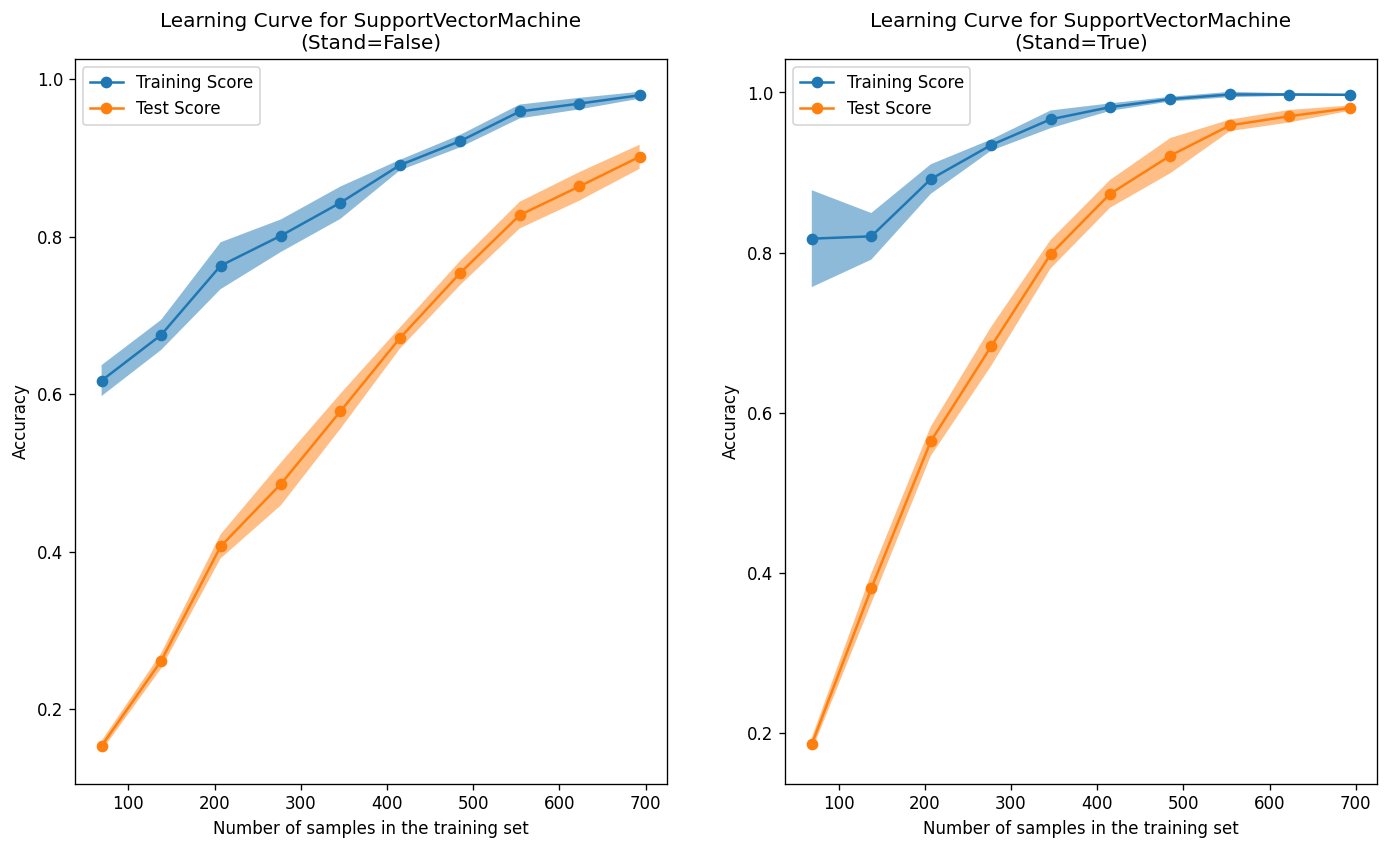

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


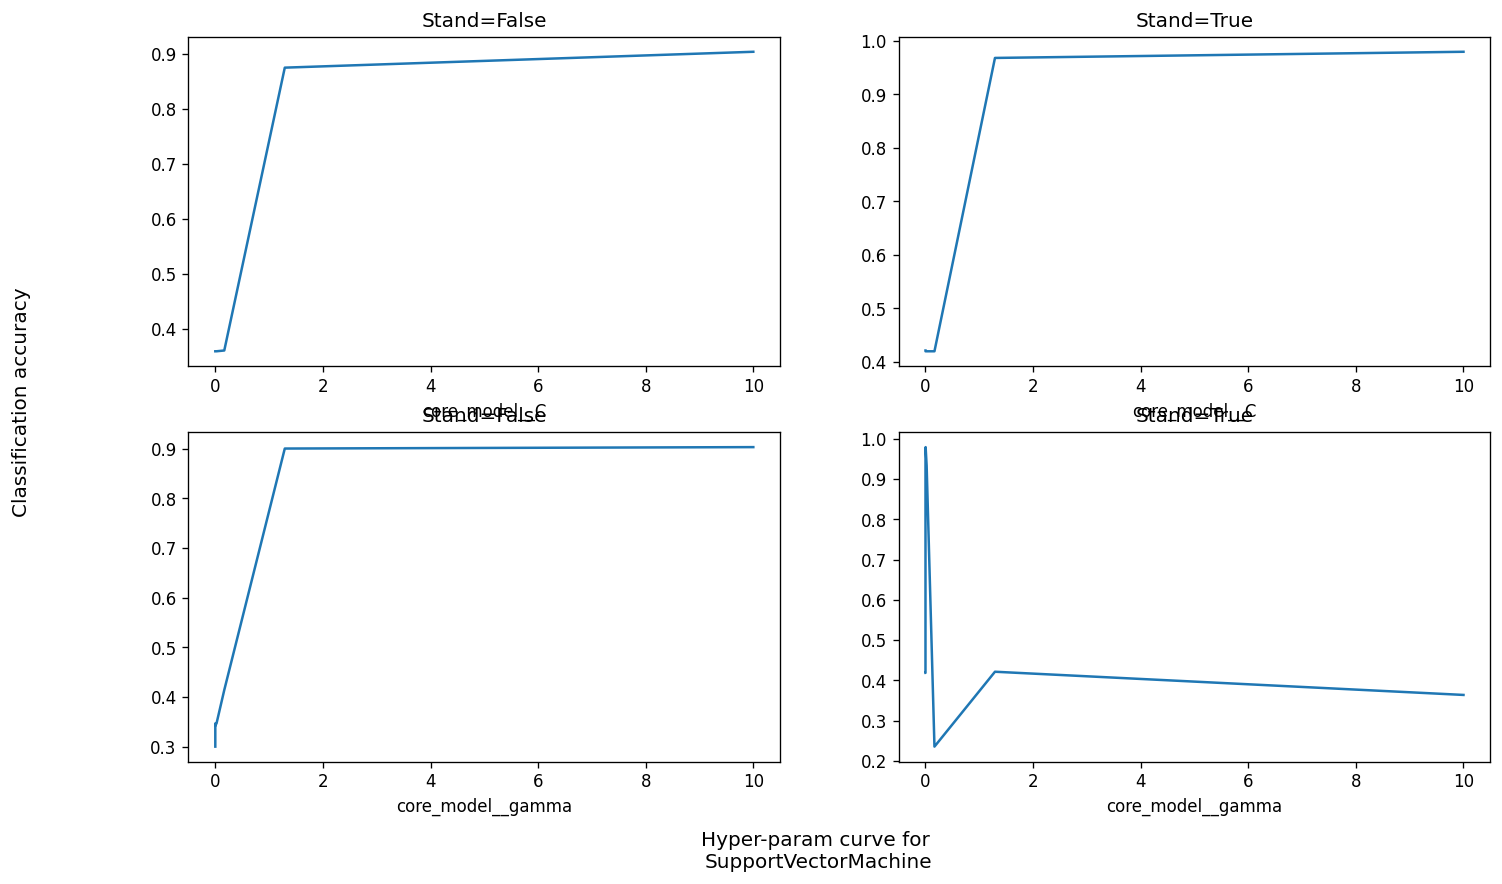

,SupportVectorMachine (Stand=False),SupportVectorMachine (Stand=True)
Accuracy,1.000000,1.00000
Precision,1.000000,1.00000
Sensitivity,1.000000,1.00000
Specificity,1.000000,1.00000
Fallout,0.000000,0.00000
F1 Score,1.000000,1.00000
ROC AUC,1.000000,1.00000
Log loss,2.189794,2.30336


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,SupportVectorMachine (Stand=False),SupportVectorMachine (Stand=True)
Accuracy,0.895623,0.976431
Precision,0.895623,0.976431
Sensitivity,0.895623,0.976431
Specificity,0.998935,0.999759
Fallout,0.001065,0.000241
F1 Score,0.846784,0.964904
ROC AUC,0.999015,0.999920
Log loss,2.471176,2.483444


In [60]:
# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


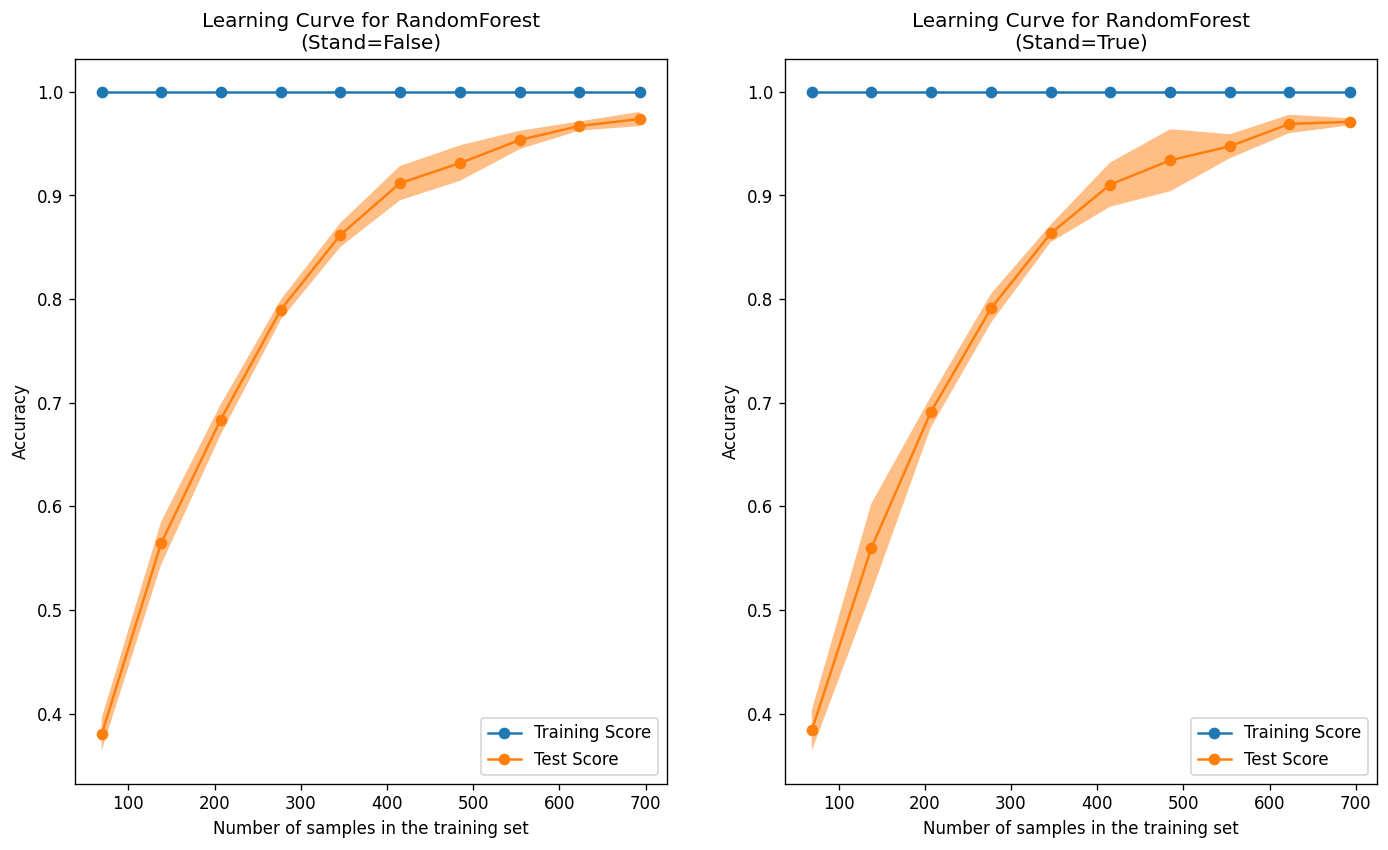

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


,RandomForest (Stand=False),RandomForest (Stand=True)
Accuracy,1.000000,1.000000
Precision,1.000000,1.000000
Sensitivity,1.000000,1.000000
Specificity,1.000000,1.000000
Fallout,0.000000,0.000000
F1 Score,1.000000,1.000000
ROC AUC,1.000000,1.000000
Log loss,0.241897,0.242235


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,RandomForest (Stand=False),RandomForest (Stand=True)
Accuracy,0.976431,0.979798
Precision,0.976431,0.979798
Sensitivity,0.976431,0.979798
Specificity,0.999759,0.999794
Fallout,0.000241,0.000206
F1 Score,0.964904,0.969901
ROC AUC,0.999920,0.999857
Log loss,0.833482,0.825907


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


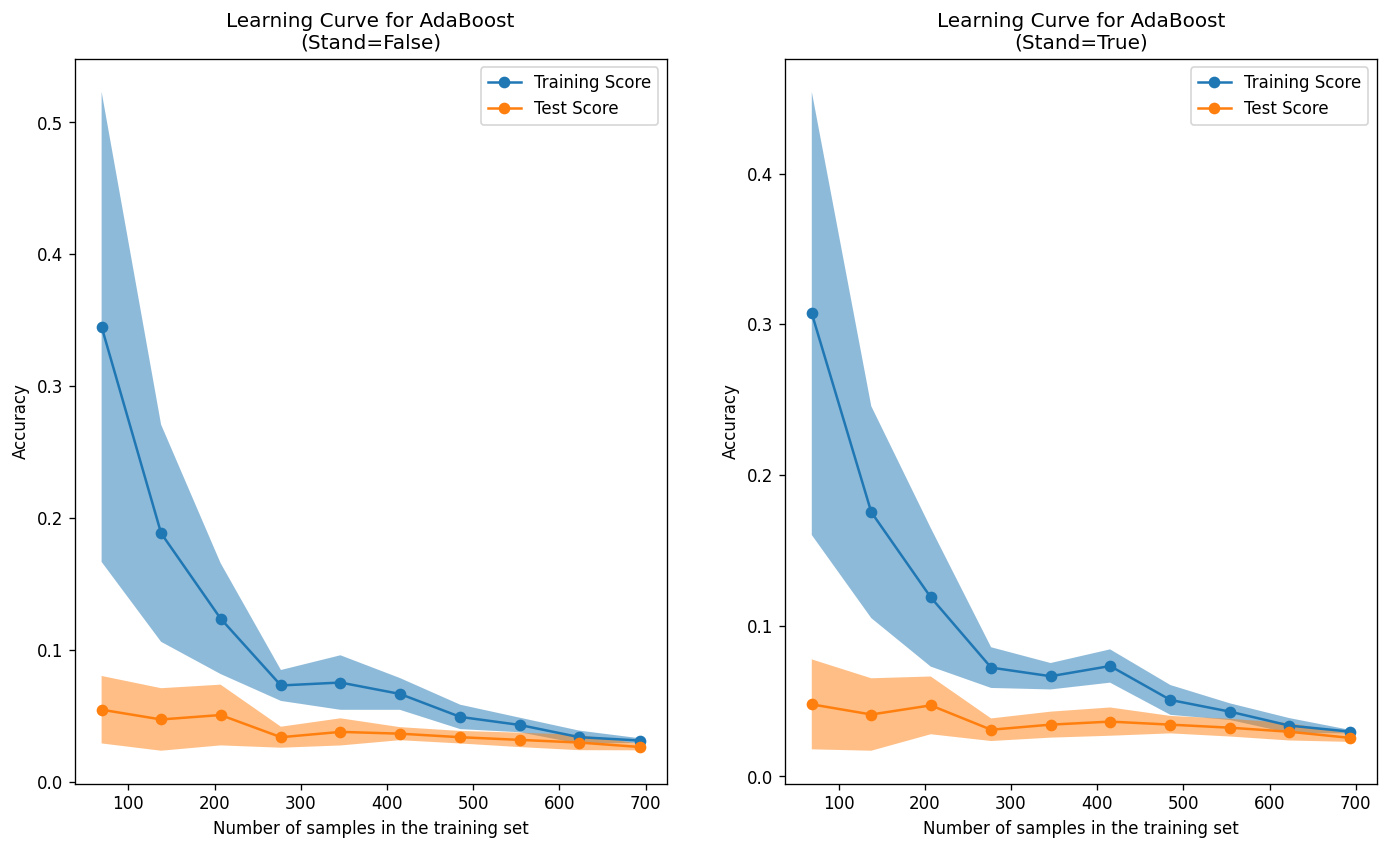

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


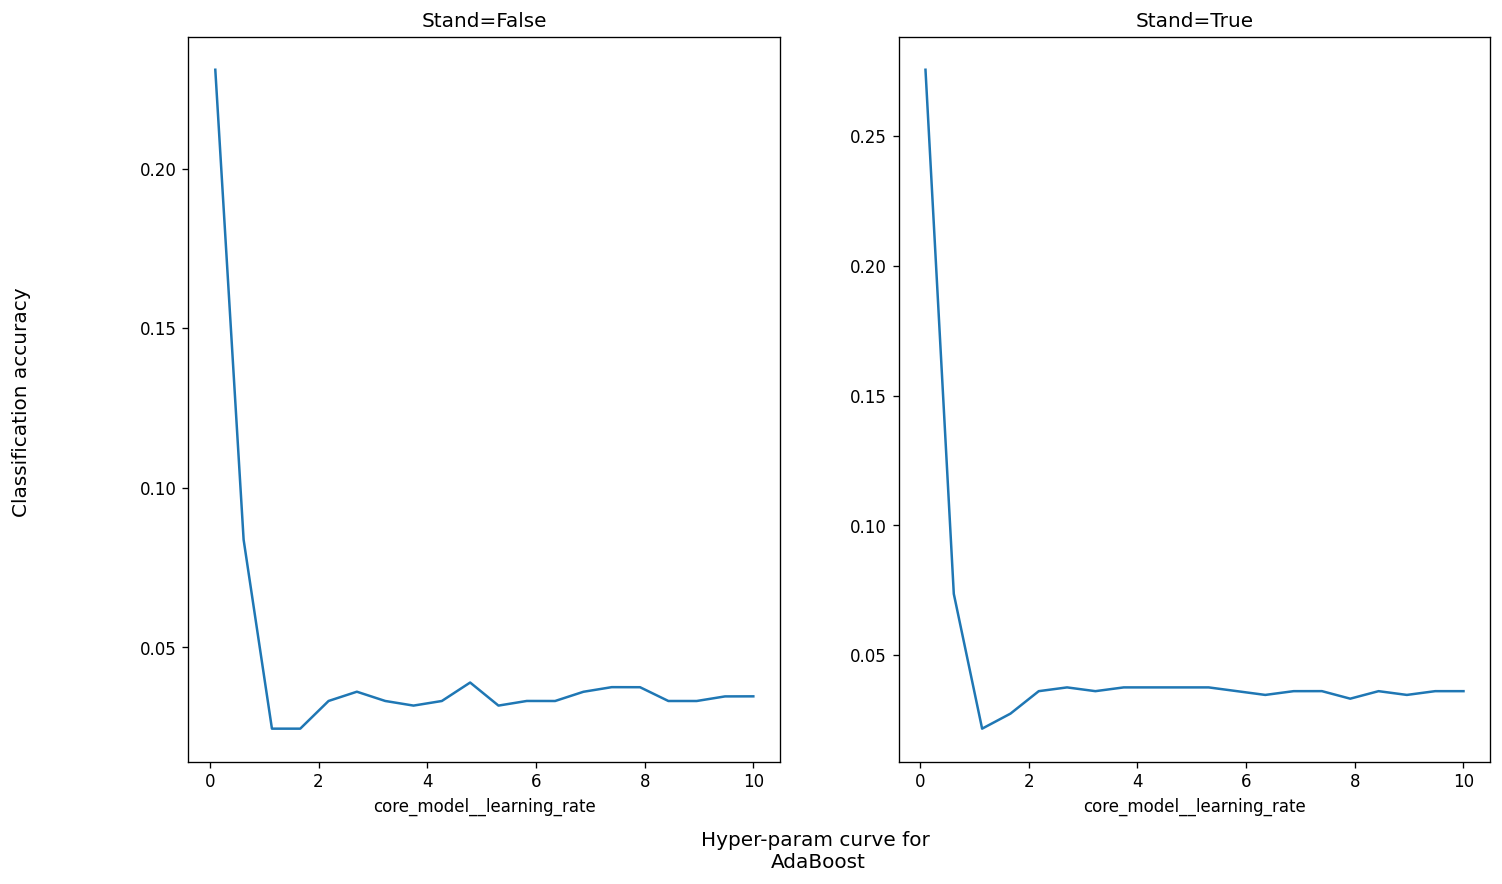

,AdaBoost (Stand=False),AdaBoost (Stand=True)
Accuracy,0.329004,0.329004
Precision,0.329004,0.329004
Sensitivity,0.329004,0.329004
Specificity,0.993153,0.993153
Fallout,0.006847,0.006847
F1 Score,0.163738,0.163738
ROC AUC,0.976575,0.976636
Log loss,2.837060,2.837133


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,AdaBoost (Stand=False),AdaBoost (Stand=True)
Accuracy,0.222222,0.218855
Precision,0.222222,0.218855
Sensitivity,0.222222,0.218855
Specificity,0.992063,0.992029
Fallout,0.007937,0.007971
F1 Score,0.081336,0.079112
ROC AUC,0.952644,0.952633
Log loss,3.132982,3.132025


In [61]:
# Random Forest
mt = ModelTester("RandomForest")
mt.test(dataset, train_set, test_set)

# Ada Boost
mt = ModelTester("AdaBoost")
mt.test(dataset, train_set, test_set)

# Gradient Boosted Trees
# mt = ModelTester("GradientBoostedTrees")
# mt.test(dataset, train_set, test_set)

~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


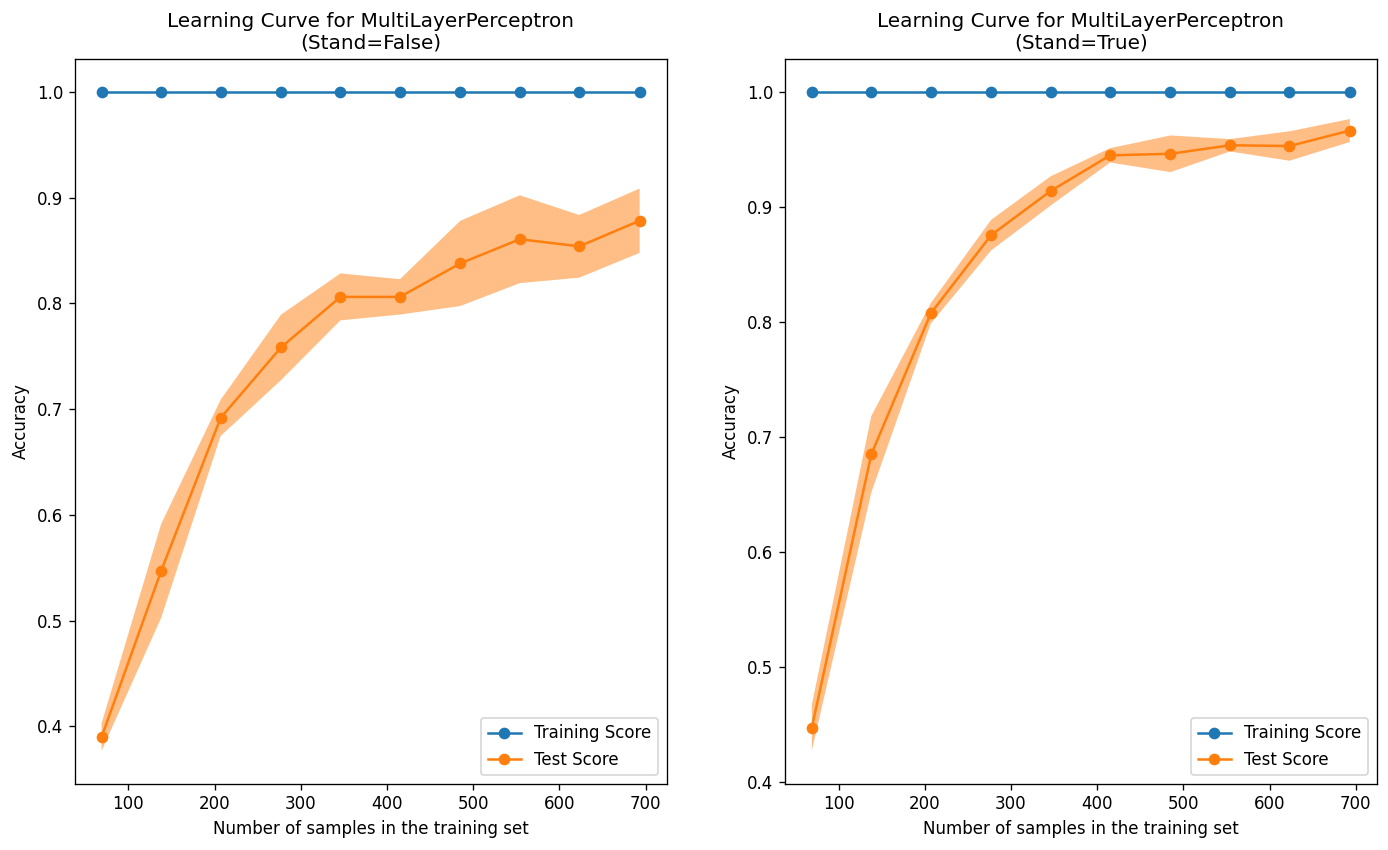

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


d:\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,MultiLayerPerceptron (Stand=False),MultiLayerPerceptron (Stand=True)
Accuracy,1.000000,1.000000
Precision,1.000000,1.000000
Sensitivity,1.000000,1.000000
Specificity,1.000000,1.000000
Fallout,0.000000,0.000000
F1 Score,1.000000,1.000000
ROC AUC,1.000000,1.000000
Log loss,0.002026,0.000113


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,MultiLayerPerceptron (Stand=False),MultiLayerPerceptron (Stand=True)
Accuracy,0.875421,0.969697
Precision,0.875421,0.969697
Sensitivity,0.875421,0.969697
Specificity,0.998729,0.999691
Fallout,0.001271,0.000309
F1 Score,0.817823,0.954928
ROC AUC,0.998442,0.999943
Log loss,0.644226,0.113428


In [62]:
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)

In [63]:
from models.Models import *

# Load Data
test_dl = DataLoader("data/test.csv", class_col_name="id")
test_dl.load()
submission_set = test_dl.get_dataset()

lc = LogisticClassifier(stand_trans=True)
lc.train(dataset)

probs, classes = lc.predict_probs(submission_set.features)
df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/logi_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.000274,0.000075,0.000076,1.722486e-06,0.003423,9.736587e-09,1.375494e-04,5.274830e-03,0.000371,8.325716e-08,...,0.000008,1.152234e-07,0.000171,0.000101,0.000002,5.244684e-07,1.266116e-06,0.000025,0.000007,0.000014
7,0.001531,0.000003,0.000018,1.406273e-03,0.000431,2.995208e-04,1.094445e-04,3.449514e-05,0.000121,8.806072e-05,...,0.000303,3.512120e-04,0.000022,0.000036,0.000854,7.174110e-05,6.283302e-07,0.000196,0.000199,0.000004
9,0.000273,0.000398,0.000123,1.362087e-04,0.000368,9.025860e-06,1.835375e-04,2.416600e-04,0.000363,2.265363e-04,...,0.000110,3.394131e-05,0.000090,0.000109,0.001194,4.040714e-04,1.859202e-05,0.000028,0.000007,0.000099
12,0.000113,0.000009,0.000061,8.842368e-04,0.000073,1.527090e-05,6.010221e-05,6.499882e-05,0.000045,3.252352e-04,...,0.000513,1.255242e-04,0.000230,0.000210,0.897970,1.967339e-02,1.803879e-06,0.000025,0.000017,0.000095
13,0.000005,0.000981,0.000003,4.887264e-04,0.000012,2.933164e-07,2.421078e-05,5.594662e-05,0.000049,1.326174e-04,...,0.000081,7.664838e-06,0.000090,0.000090,0.000014,2.730384e-03,1.103894e-05,0.000003,0.000002,0.000383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000109,0.000253,0.000059,1.036954e-04,0.000302,9.195781e-06,1.185162e-04,7.016303e-05,0.000087,1.172647e-04,...,0.000049,1.506279e-05,0.000050,0.000049,0.000422,8.426151e-04,1.005084e-05,0.000044,0.000003,0.000104
1577,0.001553,0.000357,0.001453,6.763604e-03,0.000621,1.309754e-06,2.731206e-03,2.579841e-05,0.009287,1.541104e-04,...,0.000028,6.222572e-04,0.000213,0.000111,0.001107,9.201635e-04,6.654417e-05,0.000063,0.000095,0.003540
1579,0.000006,0.000131,0.011565,2.210574e-07,0.000072,7.110111e-08,9.694365e-01,9.205897e-05,0.001719,4.108079e-07,...,0.000004,1.520022e-04,0.000534,0.000028,0.000010,8.786507e-07,1.563292e-03,0.000001,0.000132,0.000065
1580,0.000108,0.000038,0.000004,6.992391e-05,0.000006,1.976957e-05,9.998048e-07,2.702033e-07,0.000002,9.550949e-05,...,0.000021,4.365885e-04,0.000001,0.000003,0.006321,8.611828e-06,1.468259e-06,0.000348,0.000075,0.000001


In [64]:
mlp = MultiLayerPerceptron(stand_trans=True)
mlp.train(dataset)
probs, classes = lc.predict_probs(submission_set.features)
df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/mlp_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.000274,0.000075,0.000076,1.722486e-06,0.003423,9.736587e-09,1.375494e-04,5.274830e-03,0.000371,8.325716e-08,...,0.000008,1.152234e-07,0.000171,0.000101,0.000002,5.244684e-07,1.266116e-06,0.000025,0.000007,0.000014
7,0.001531,0.000003,0.000018,1.406273e-03,0.000431,2.995208e-04,1.094445e-04,3.449514e-05,0.000121,8.806072e-05,...,0.000303,3.512120e-04,0.000022,0.000036,0.000854,7.174110e-05,6.283302e-07,0.000196,0.000199,0.000004
9,0.000273,0.000398,0.000123,1.362087e-04,0.000368,9.025860e-06,1.835375e-04,2.416600e-04,0.000363,2.265363e-04,...,0.000110,3.394131e-05,0.000090,0.000109,0.001194,4.040714e-04,1.859202e-05,0.000028,0.000007,0.000099
12,0.000113,0.000009,0.000061,8.842368e-04,0.000073,1.527090e-05,6.010221e-05,6.499882e-05,0.000045,3.252352e-04,...,0.000513,1.255242e-04,0.000230,0.000210,0.897970,1.967339e-02,1.803879e-06,0.000025,0.000017,0.000095
13,0.000005,0.000981,0.000003,4.887264e-04,0.000012,2.933164e-07,2.421078e-05,5.594662e-05,0.000049,1.326174e-04,...,0.000081,7.664838e-06,0.000090,0.000090,0.000014,2.730384e-03,1.103894e-05,0.000003,0.000002,0.000383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000109,0.000253,0.000059,1.036954e-04,0.000302,9.195781e-06,1.185162e-04,7.016303e-05,0.000087,1.172647e-04,...,0.000049,1.506279e-05,0.000050,0.000049,0.000422,8.426151e-04,1.005084e-05,0.000044,0.000003,0.000104
1577,0.001553,0.000357,0.001453,6.763604e-03,0.000621,1.309754e-06,2.731206e-03,2.579841e-05,0.009287,1.541104e-04,...,0.000028,6.222572e-04,0.000213,0.000111,0.001107,9.201635e-04,6.654417e-05,0.000063,0.000095,0.003540
1579,0.000006,0.000131,0.011565,2.210574e-07,0.000072,7.110111e-08,9.694365e-01,9.205897e-05,0.001719,4.108079e-07,...,0.000004,1.520022e-04,0.000534,0.000028,0.000010,8.786507e-07,1.563292e-03,0.000001,0.000132,0.000065
1580,0.000108,0.000038,0.000004,6.992391e-05,0.000006,1.976957e-05,9.998048e-07,2.702033e-07,0.000002,9.550949e-05,...,0.000021,4.365885e-04,0.000001,0.000003,0.006321,8.611828e-06,1.468259e-06,0.000348,0.000075,0.000001


In [65]:
mlp = RandomForest(stand_trans=True)
mlp.train(dataset)
probs, classes = lc.predict_probs(submission_set.features)
df = pd.DataFrame(
    data=probs,
    columns=dl.classes,
    index=test_dl.classes
)
display(df)
df.to_csv("submissions/rf_submission.csv", index_label="id")

,Acer_Opalus,Pterocarya_Stenoptera,Quercus_Hartwissiana,Tilia_Tomentosa,Quercus_Variabilis,Magnolia_Salicifolia,Quercus_Canariensis,Quercus_Rubra,Quercus_Brantii,Salix_Fragilis,...,Quercus_Ellipsoidalis,Quercus_x_Hispanica,Quercus_Shumardii,Quercus_Rhysophylla,Castanea_Sativa,Ulmus_Bergmanniana,Quercus_Nigra,Salix_Intergra,Quercus_Infectoria_sub,Sorbus_Aria
4,0.000274,0.000075,0.000076,1.722486e-06,0.003423,9.736587e-09,1.375494e-04,5.274830e-03,0.000371,8.325716e-08,...,0.000008,1.152234e-07,0.000171,0.000101,0.000002,5.244684e-07,1.266116e-06,0.000025,0.000007,0.000014
7,0.001531,0.000003,0.000018,1.406273e-03,0.000431,2.995208e-04,1.094445e-04,3.449514e-05,0.000121,8.806072e-05,...,0.000303,3.512120e-04,0.000022,0.000036,0.000854,7.174110e-05,6.283302e-07,0.000196,0.000199,0.000004
9,0.000273,0.000398,0.000123,1.362087e-04,0.000368,9.025860e-06,1.835375e-04,2.416600e-04,0.000363,2.265363e-04,...,0.000110,3.394131e-05,0.000090,0.000109,0.001194,4.040714e-04,1.859202e-05,0.000028,0.000007,0.000099
12,0.000113,0.000009,0.000061,8.842368e-04,0.000073,1.527090e-05,6.010221e-05,6.499882e-05,0.000045,3.252352e-04,...,0.000513,1.255242e-04,0.000230,0.000210,0.897970,1.967339e-02,1.803879e-06,0.000025,0.000017,0.000095
13,0.000005,0.000981,0.000003,4.887264e-04,0.000012,2.933164e-07,2.421078e-05,5.594662e-05,0.000049,1.326174e-04,...,0.000081,7.664838e-06,0.000090,0.000090,0.000014,2.730384e-03,1.103894e-05,0.000003,0.000002,0.000383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0.000109,0.000253,0.000059,1.036954e-04,0.000302,9.195781e-06,1.185162e-04,7.016303e-05,0.000087,1.172647e-04,...,0.000049,1.506279e-05,0.000050,0.000049,0.000422,8.426151e-04,1.005084e-05,0.000044,0.000003,0.000104
1577,0.001553,0.000357,0.001453,6.763604e-03,0.000621,1.309754e-06,2.731206e-03,2.579841e-05,0.009287,1.541104e-04,...,0.000028,6.222572e-04,0.000213,0.000111,0.001107,9.201635e-04,6.654417e-05,0.000063,0.000095,0.003540
1579,0.000006,0.000131,0.011565,2.210574e-07,0.000072,7.110111e-08,9.694365e-01,9.205897e-05,0.001719,4.108079e-07,...,0.000004,1.520022e-04,0.000534,0.000028,0.000010,8.786507e-07,1.563292e-03,0.000001,0.000132,0.000065
1580,0.000108,0.000038,0.000004,6.992391e-05,0.000006,1.976957e-05,9.998048e-07,2.702033e-07,0.000002,9.550949e-05,...,0.000021,4.365885e-04,0.000001,0.000003,0.006321,8.611828e-06,1.468259e-06,0.000348,0.000075,0.000001
